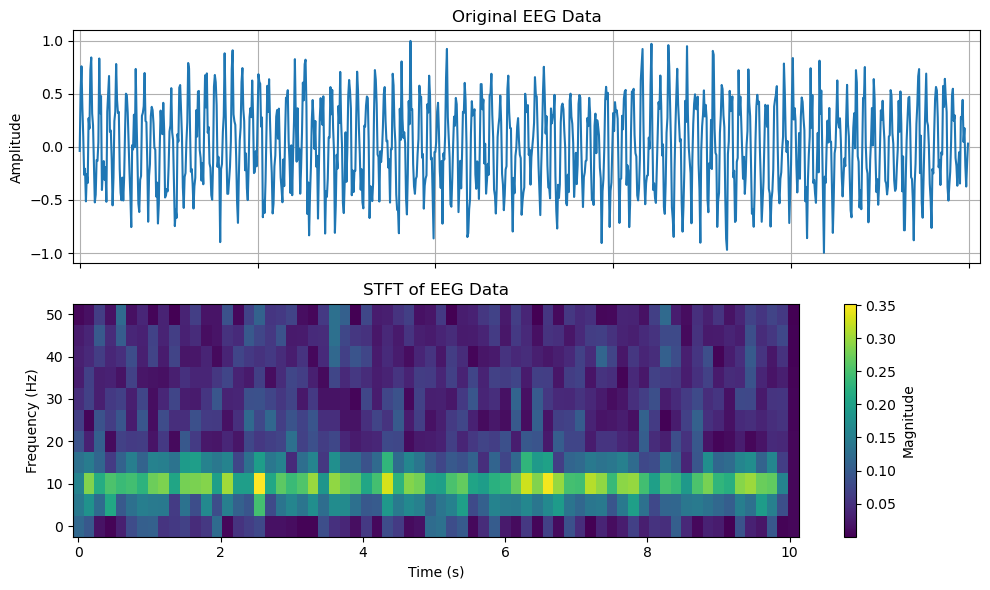

In [1]:
import numpy as np
from scipy.signal import stft
import matplotlib.pyplot as plt

# Generate sample EEG data (replace this with your actual EEG data)
fs = 100 # Sampling frequency (Hz)
t = np.arange(0, 10, 1/fs)
eeg_data = 0.5 * np.sin(2 * np.pi * 10 * t) + 0.2 * np.sin(2 * np.pi * 50 * t)
eeg_data += 0.2 * np.random.randn(len(t))

# Parameters for STFT analysis
nperseg = 20  # Window size for STFT
noverlap = 5  # Overlapping samples

# Compute STFT
frequencies, times, Zxx = stft(eeg_data, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Create subplots for original EEG data and STFT
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Plot the original EEG data in the top subplot
ax1.plot(t, eeg_data)
ax1.set_title('Original EEG Data')
ax1.set_ylabel('Amplitude')
ax1.grid(True)

# Plot the STFT in the bottom subplot
cax = ax2.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto')
ax2.set_title('STFT of EEG Data')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
plt.colorbar(cax, ax=ax2, label='Magnitude')  # This is where you add the colorbar

plt.tight_layout()
plt.show()

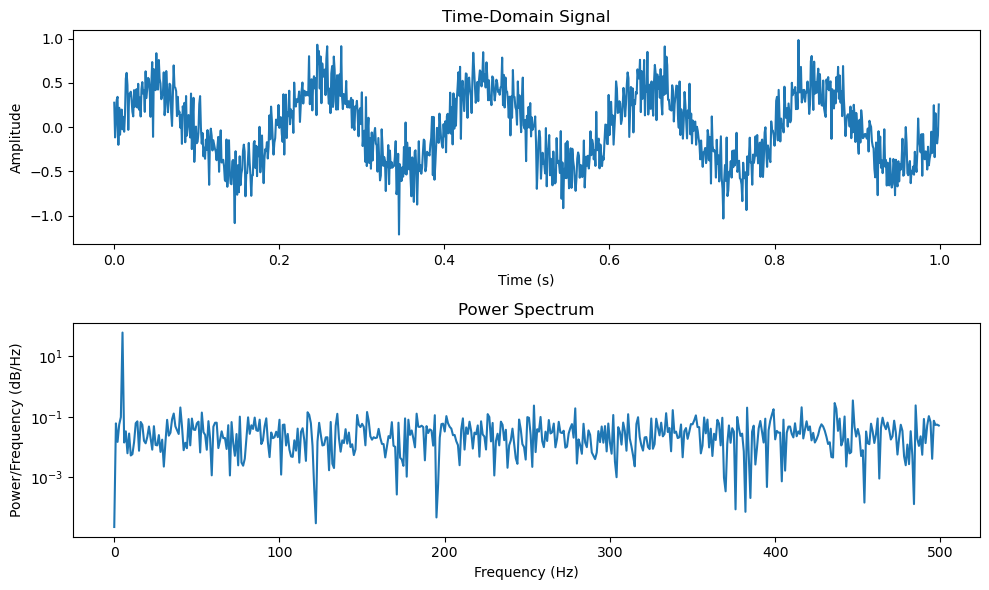

In [2]:
# Power Spectrum
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import tfr_multitaper

# Generate a sample time-domain signal (sine wave with noise)
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector from 0 to 1 second
f1 = 5  # Frequency of the sine wave (Hz)
signal = 0.5 * np.sin(2 * np.pi * f1 * t) + 0.2 * np.random.randn(len(t))

# Compute the FFT
N = len(t)  # Length of the signal
frequencies = np.fft.fftfreq(N, 1/fs)  # Frequency values
fft_result = np.fft.fft(signal)  # FFT of the signal

# Compute the one-sided power spectrum (only positive frequencies)
power_spectrum = np.abs(fft_result[:N//2]) ** 2

# Normalize the power spectrum by the length of the signal
power_spectrum /= N

# Frequency values for the one-sided power spectrum
positive_frequencies = frequencies[:N//2]

# Plot the original signal and its power spectrum
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Time-Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(positive_frequencies, power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.tight_layout()

plt.show()

In [3]:
#!pip install PyWavelets

In [4]:
#wavelet packet transform

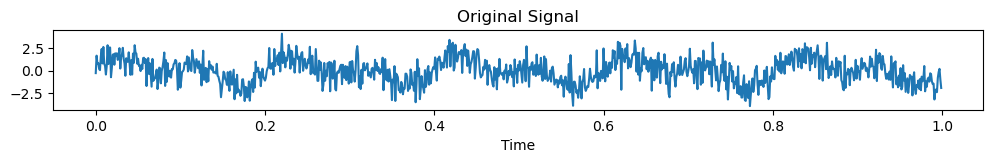

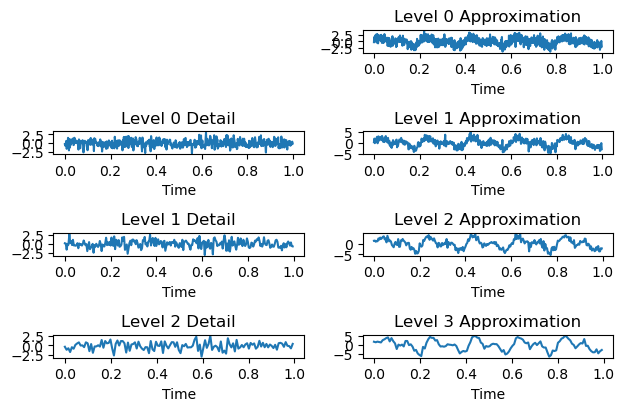

In [5]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a sample signal (you can replace this with your own data)
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, num=1000, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 10 * t) + np.random.randn(len(t))

# Perform Wavelet Packet Transform (WPT)
wavelet = "db4"  # Wavelet type (change as needed)
level = 3  # Number of decomposition levels

wp = pywt.WaveletPacket(data=signal, wavelet=wavelet, mode="symmetric", maxlevel=level)

# Plot the original signal and the WPT coefficients
plt.figure(figsize=(12, 6))
plt.subplot(level + 2, 1, 1)
plt.plot(t, signal)
plt.title("Original Signal")
plt.xlabel("Time")
plt.show()
for i in range(level + 1):
    t_level = np.linspace(0, 1, num=len(wp["a" * i].data), endpoint=False)  # Adjust t to match data length
    plt.subplot(level + 2, 2, 2 * i + 2)
    plt.plot(t_level, wp["a" * i].data)
    plt.title(f"Level {i} Approximation")
    plt.xlabel("Time")

    if i < level:
        t_level = np.linspace(0, 1, num=len(wp["d" * (i + 1)].data), endpoint=False)  # Adjust t to match data length
        plt.subplot(level + 2, 2, 2 * i + 3)
        plt.plot(t_level, wp["d" * (i + 1)].data)
        plt.title(f"Level {i} Detail")
        plt.xlabel("Time")

plt.tight_layout()
plt.show()

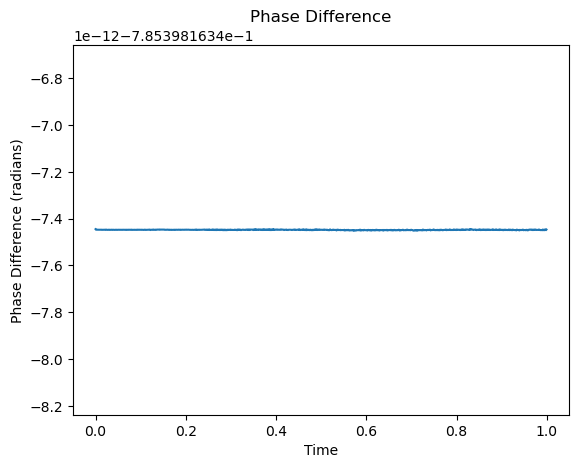

Amplitude Coupling (Correlation): 0.3994181798859566
Functional Connectivity (Pearson Correlation): 0.4354491562260985
Connectivity Matrix:
[[0.         3.70982593 4.31349419 3.27508697 5.03293814 4.94585256
  4.11028706 3.35475266 4.06482339 4.98983534]
 [3.70982593 0.         4.37459671 3.89879005 7.11901877 4.28744282
  3.81159251 3.38121649 4.95172472 5.6648409 ]
 [4.31349419 4.37459671 0.         3.67119631 6.17569625 4.8617468
  4.06911322 4.22813996 4.06736421 4.23437908]
 [3.27508697 3.89879005 3.67119631 0.         6.78284849 5.53747398
  2.98076498 3.25661557 4.13460385 5.67811101]
 [5.03293814 7.11901877 6.17569625 6.78284849 0.         5.45068574
  6.66706735 5.88426368 6.45194233 6.60769607]
 [4.94585256 4.28744282 4.8617468  5.53747398 5.45068574 0.
  5.38447709 3.91625437 4.8011458  4.34271849]
 [4.11028706 3.81159251 4.06911322 2.98076498 6.66706735 5.38447709
  0.         4.08072381 4.59152497 5.94748708]
 [3.35475266 3.38121649 4.22813996 3.25661557 5.88426368 3.91625

/home/pawan/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4461: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))


In [6]:
#phase coherence, amplitude coupling, and connectivity in signal data
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.signal import coherence
from scipy.stats import pearsonr
from scipy.spatial.distance import pdist, squareform

# Simulated EEG signals
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, num=1000, endpoint=False)
signal1 = np.sin(2 * np.pi * 5 * t)  # Signal 1
signal2 = np.sin(2 * np.pi * 5 * t + np.pi / 4)  # Signal 2 with a phase shift

# Phase Coherence
# Calculate Hilbert Transform to obtain the analytic signal
analytic_signal1 = hilbert(signal1)
analytic_signal2 = hilbert(signal2)

# Compute phase difference
phase_diff = np.angle(analytic_signal1) - np.angle(analytic_signal2)
phase_diff = np.unwrap(phase_diff)  # Unwrap phase for better visualization

# Plot phase difference
plt.figure()
plt.plot(t, phase_diff)
plt.title("Phase Difference")
plt.xlabel("Time")
plt.ylabel("Phase Difference (radians)")
plt.show()

# Amplitude Coupling
# Calculate the amplitude envelope
amp_env1 = np.abs(analytic_signal1)
amp_env2 = np.abs(analytic_signal2)

# Calculate the correlation between the amplitude envelopes
corr_coef, _ = pearsonr(amp_env1, amp_env2)
print("Amplitude Coupling (Correlation):", corr_coef)

# Connectivity Analysis (e.g., using functional connectivity)
# Simulated data for two brain regions
region1 = np.random.randn(1000)  # Brain region 1
region2 = 0.5 * region1 + np.random.randn(1000)  # Brain region 2 with added noise

# Compute Pearson correlation between the two regions
corr_coef, _ = pearsonr(region1, region2)
print("Functional Connectivity (Pearson Correlation):", corr_coef)

# Connectivity Matrix (example using distance)
data = np.random.randn(10, 10)  # Simulated connectivity data
distances = pdist(data, 'euclidean')  # Calculate distances between rows
connectivity_matrix = squareform(distances)  # Create a connectivity matrix

print("Connectivity Matrix:")
print(connectivity_matrix)